In [0]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#from google.colab import drive
#drive.mount('/content/drive')


In [0]:
#!pip install notify_run

In [0]:
#!notify-run register

In [0]:
#from notify_run import Notify
#notify = Notify()

# Carga y limpieza de datos

## (Hecho con la info obtenida en el notebook LimpiezaDeDatos)

In [0]:
#import io
#ruta = io.StringIO(uploaded['train.csv'].decode('utf-8'))
#ejemplo = pd.read_csv("../content/drive/My Drive/data/ejemploRespuesta.csv", names = ["id", "precio"])
#test = pd.read_csv("../content/drive/My Drive/data/test.csv", parse_dates = ['fecha'])
#train = pd.read_csv("../content/drive/My Drive/data/train.csv",parse_dates = ['fecha'])
ejemplo =  pd.read_csv('data/ejemploRespuesta.csv', names = ["id", "precio"] )
test =  pd.read_csv('data/test.csv', parse_dates = ['fecha'])
train = pd.read_csv('data/train.csv',parse_dates = ['fecha'])

In [0]:
#A los nulls los relleno con el promedio de metroscubiertos de todas las publicaciones
train['metroscubiertos']=train['metroscubiertos'].fillna(round(train['metroscubiertos'].mean()))
test['metroscubiertos']=test['metroscubiertos'].fillna(round(test['metroscubiertos'].mean()))
#Luego convierto metroscubiertos a  np.int16
train['metroscubiertos']=train['metroscubiertos'].astype(np.int16)
test['metroscubiertos']=test['metroscubiertos'].astype(np.int16)

In [0]:
#A los nulls los relleno con el promedio de metrostotales de todas las publicaciones
train['metrostotales']=train['metrostotales'].fillna(round(train['metrostotales'].mean()))
test['metrostotales']=test['metrostotales'].fillna(round(test['metrostotales'].mean()))
#Luego convierto metrostotales a  np.int16
train['metrostotales']=train['metrostotales'].astype(np.int16)
test['metrostotales']=test['metrostotales'].astype(np.int16)

In [0]:
#El precio promedio de las publicaciones que no tienen datos de cant de habitaciones esta entre el precio
#promedio de las que tienen 2 y 3 habitaciones
#Entonces voy a asumir que tienen 3 habitaciones, ya que es el valor al cual el precio mas se les asemeja.
train['habitaciones']=train['habitaciones'].fillna(3)
test['habitaciones']=test['habitaciones'].fillna(3)
#Luego convierto a np.int8
train['habitaciones']=train['habitaciones'].astype(np.int8)
test['habitaciones']=test['habitaciones'].astype(np.int8)

In [0]:
#A los que no tienen datos de antiguedad los relleno con la antiguedad promedio (es 8)
train['antiguedad']=train['antiguedad'].fillna(round(train['antiguedad'].mean()))
test['antiguedad']=test['antiguedad'].fillna(round(train['antiguedad'].mean()))
#Luego convierto a np.uint8
train['antiguedad']=train['antiguedad'].astype(np.uint8)
test['antiguedad']=test['antiguedad'].astype(np.uint8)

In [0]:
#El precio promedio de los que tienen NULL en garage es parecido al de los que tienen 2.
#Relleno los nulls de esta columna con un 2.
train['garages']=train['garages'].fillna(2)
test['garages']=test['garages'].fillna(2)
#convierto a np.int8
train['garages']=train['garages'].astype(np.int8)
test['garages']=test['garages'].astype(np.int8)

In [0]:
#El precio promedio de los que tienen NULL en banos es mas parecido al de los que tienen 2.
#Relleno los nulls de esta columna con un 2.
train['banos']=train['banos'].fillna(2)
test['banos']=test['banos'].fillna(2)
#convierto a np.int8
train['banos']=train['banos'].astype(np.int8)
test['banos']=test['banos'].astype(np.int8)

In [0]:
train['gimnasio']=train['gimnasio'].astype(np.int8)
train['usosmultiples']=train['usosmultiples'].astype(np.int8)
train['piscina']=train['piscina'].astype(np.int8)
train['escuelascercanas']=train['escuelascercanas'].astype(np.int8)
train['centroscomercialescercanos']=train['centroscomercialescercanos'].astype(np.int8)
test['gimnasio']=test['gimnasio'].astype(np.int8)
test['usosmultiples']=test['usosmultiples'].astype(np.int8)
test['piscina']=test['piscina'].astype(np.int8)
test['escuelascercanas']=test['escuelascercanas'].astype(np.int8)
test['centroscomercialescercanos']=test['centroscomercialescercanos'].astype(np.int8)

In [0]:
#Creo categoria para los que no tienen categoria en provincia:
train['provincia']=train['provincia'].fillna('N/A')
test['provincia']=test['provincia'].fillna('N/A')
#Creo categoria para los que no tienen categoria en ciudad:
train['ciudad']=train['ciudad'].fillna('N/A')
test['ciudad']=test['ciudad'].fillna('N/A')
#Relleno los nulls en direccion con un - .
train['direccion']=train['direccion'].fillna('-')
test['direccion']=test['direccion'].fillna('-')
#Creo categoria para los que no tienen categoria en tipodepropiedad:
train['tipodepropiedad']=train['tipodepropiedad'].fillna('N/A')
test['tipodepropiedad']=test['tipodepropiedad'].fillna('N/A')

In [0]:
train['titulo']=train['titulo'].fillna(' ')
train['descripcion']=train['descripcion'].fillna(' ')
test['titulo']=test['titulo'].fillna(' ')
test['descripcion']=test['descripcion'].fillna(' ')

In [0]:
train['precio']=train['precio'].astype(np.int32)
train['id']=train['id'].astype(np.int32)
test['id']=test['id'].astype(np.int32)

In [0]:
#Algunas columnas tienen nulls que no se como encararlos. Por ahora los relleno con 0
train=train.fillna(0)
test=test.fillna(0)

# Armado de features:

In [0]:
train.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio', 'puntaje_por_fecha'],
      dtype='object')

In [0]:
test.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'puntaje_por_fecha'],
      dtype='object')

## OneHotEncoding para tipodepropiedad

In [0]:
#Voy a usar OneHotEncoder para convertir la columna categorica tipodepropiedad en dummies.
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
dummies = enc.fit_transform(train['tipodepropiedad'].values.reshape(-1, 1)).toarray()
dummies = pd.DataFrame(dummies)
dummies_test = enc.transform(test['tipodepropiedad'].values.reshape(-1, 1)).toarray()
dummies_test = pd.DataFrame(dummies_test)

In [0]:
dummies.columns=enc.categories_[0].tolist()
dummies=dummies.add_prefix('prop_')
dummies=dummies.astype(np.int8)

dummies_test.columns=enc.categories_[0].tolist()
dummies_test=dummies_test.add_prefix('prop_')
dummies_test=dummies_test.astype(np.int8)

In [0]:
dummies.head()

,prop_Apartamento,prop_Bodega comercial,prop_Casa,prop_Casa en condominio,prop_Casa uso de suelo,prop_Departamento Compartido,prop_Duplex,prop_Edificio,prop_Garage,prop_Hospedaje,prop_Huerta,prop_Inmuebles productivos urbanos,prop_Local Comercial,prop_Local en centro comercial,prop_Lote,prop_N/A,prop_Nave industrial,prop_Oficina comercial,prop_Otros,prop_Quinta Vacacional,prop_Rancho,prop_Terreno,prop_Terreno comercial,prop_Terreno industrial,prop_Villa
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
dummies_test.head()

,prop_Apartamento,prop_Bodega comercial,prop_Casa,prop_Casa en condominio,prop_Casa uso de suelo,prop_Departamento Compartido,prop_Duplex,prop_Edificio,prop_Garage,prop_Hospedaje,prop_Huerta,prop_Inmuebles productivos urbanos,prop_Local Comercial,prop_Local en centro comercial,prop_Lote,prop_N/A,prop_Nave industrial,prop_Oficina comercial,prop_Otros,prop_Quinta Vacacional,prop_Rancho,prop_Terreno,prop_Terreno comercial,prop_Terreno industrial,prop_Villa
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## OneHotEncoding para provincias

In [0]:
#Voy a usar OneHotEncoder para convertir la columna categorica provincia en dummies.
enc_prov = OneHotEncoder()
dummies_prov = enc_prov.fit_transform(train['provincia'].values.reshape(-1, 1)).toarray()
dummies_prov = pd.DataFrame(dummies_prov)

dummies_prov_test = enc_prov.transform(test['provincia'].values.reshape(-1, 1)).toarray()
dummies_prov_test = pd.DataFrame(dummies_prov_test)

In [0]:
dummies_prov.columns=enc_prov.categories_[0].tolist()
dummies_prov=dummies_prov.add_prefix('prov_')
dummies_prov=dummies_prov.astype(np.int8)

dummies_prov_test.columns=enc_prov.categories_[0].tolist()
dummies_prov_test=dummies_prov_test.add_prefix('prov_')
dummies_prov_test=dummies_prov_test.astype(np.int8)

In [0]:
dummies_prov.head()

,prov_Aguascalientes,prov_Baja California Norte,prov_Baja California Sur,prov_Campeche,prov_Chiapas,prov_Chihuahua,prov_Coahuila,prov_Colima,prov_Distrito Federal,prov_Durango,prov_Edo. de México,prov_Guanajuato,prov_Guerrero,prov_Hidalgo,prov_Jalisco,prov_Michoacán,prov_Morelos,prov_N/A,prov_Nayarit,prov_Nuevo León,prov_Oaxaca,prov_Puebla,prov_Querétaro,prov_Quintana Roo,prov_San luis Potosí,prov_Sinaloa,prov_Sonora,prov_Tabasco,prov_Tamaulipas,prov_Tlaxcala,prov_Veracruz,prov_Yucatán,prov_Zacatecas
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# OneHotEncoding para ciudades

In [0]:
#Mismo procedimiento que el anterior pero para ciudades
enc_ciud = OneHotEncoder(handle_unknown='ignore')
dummies_ciud = enc_ciud.fit_transform(train['ciudad'].values.reshape(-1, 1)).toarray()
dummies_ciud = pd.DataFrame(dummies_ciud)

dummies_ciud_test = enc_ciud.transform(test['ciudad'].values.reshape(-1, 1)).toarray()
dummies_ciud_test = pd.DataFrame(dummies_ciud_test)

dummies_ciud.columns=enc_ciud.categories_[0].tolist()
dummies_ciud=dummies_ciud.add_prefix('ciud_')
dummies_ciud=dummies_ciud.astype(np.int8)

dummies_ciud_test.columns=enc_ciud.categories_[0].tolist()
dummies_ciud_test=dummies_ciud_test.add_prefix('ciud_')
dummies_ciud_test=dummies_ciud_test.astype(np.int8)

dummies_ciud.head()

,ciud_Abalá,ciud_Abasolo,ciud_Abejones,ciud_Acajete,ciud_Acambay,ciud_Acaponeta,ciud_Acapulco de Juárez,ciud_Acateno,ciud_Acatic,ciud_Acatzingo,ciud_Acayucan,ciud_Acolman,ciud_Aconchi,ciud_Actopan,ciud_Acuitzio,ciud_Aculco,ciud_Acuña,ciud_Agua Dulce,ciud_Agua Prieta,ciud_Aguascalientes,ciud_Ahome,ciud_Ahuacatlán,ciud_Ahualulco,ciud_Ahualulco de Mercado,ciud_Ahuazotepec,ciud_Ajacuba,ciud_Alamo Temapache,ciud_Alamos,ciud_Aldama,ciud_Allende,ciud_Almoloya,ciud_Almoloya de Alquisiras,ciud_Almoloya de Juárez,ciud_Almoloya del Río,ciud_Altamira,ciud_Altotonga,ciud_Alvarado,ciud_Alvaro Obregón,ciud_Amacuzac,ciud_Amanalco,...,ciud_Yauhquemecan,ciud_Yauhquemehcan,ciud_Yautepec,ciud_Yaxcabá,ciud_Yaxkukul,ciud_Yecapixtla,ciud_Yobaín,ciud_Yuriria,ciud_Zacapu,ciud_Zacatecas,ciud_Zacatelco,ciud_Zacatepec,ciud_Zacatlán,ciud_Zacoalco de Torres,ciud_Zacualpan,ciud_Zamora,ciud_Zapopan,ciud_Zapotiltic,ciud_Zapotlanejo,ciud_Zapotlán de Juárez,ciud_Zapotlán el Grande,ciud_Zaragoza,ciud_Zempoala,ciud_Zihuatanejo de Azueta,ciud_Zimapán,ciud_Zimatlán de Alvarez,ciud_Zinacantepec,ciud_Zinapécuaro,ciud_Zináparo,ciud_ZirAndaro,ciud_Zitácuaro,ciud_Zumpahuacán,ciud_Zumpango,ciud_otra,ciud_ácatlán,ciud_ácatlán de Juárez,ciud_ácaxochitlán,ciud_ácámbaro,ciud_áutlán de Navarro,ciud_áyotlán
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Features sobre el tiempo

En el TP1 vimos como los precios iban en aumento a medida que el tiempo aumentaba, por lo que nos interesa crear nuevos features tomando en cuenta el tiempo en el que se publicaron las propiedades.


Para realizar un nuevo feature comenzaremos añadiendo un peso para cada fecha, este peso irá en aumento a medida que las fechas van subiendo, así simularemos el crecimiento del precio a lo largo del tiempo.

In [0]:
#Califico las fechas de acuerdo a la diferencia entre la fecha actual y la fecha mínima sobre el máximo de dias
fecha_min = train.fecha.min()
fecha_max = train.fecha.max()
delta_max_days = (fecha_max - fecha_min).days
def calificar_fecha(fecha):
    delta = fecha - fecha_min
    return delta.days/delta_max_days

In [0]:
train["puntaje_por_fecha"] = train['fecha'].transform(lambda x: calificar_fecha(x))
train.head(1)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,puntaje_por_fecha
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,8,2,1,2,80,80,23533.0,0.0,0.0,2015-08-23,0,0,0,0,0,2273000,0.728368


In [0]:
#Set de test
fecha_min = test.fecha.min()
fecha_max = test.fecha.max()
delta_max_days = (fecha_max - fecha_min).days
test["puntaje_por_fecha"] = test['fecha'].transform(lambda x: calificar_fecha(x))
test.head(1)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,puntaje_por_fecha
0,4941,"casa en venta en miguel hidalgo, distrito federal",<p>excelente casa estilo moderno.</p>,Casa,Bosque de Cedros,Miguel Hidalgo,Distrito Federal,29,3,2,4,300,176,0.0,19.408668,-99.246767,2013-07-20,0,0,0,0,0,0.309967


## Features descripcion

Para el primer TP descubrimos que habia ciertas palabras que estaban correlacionadas a mayor precio y otras a menor precio. Usando esa informacion vamos a armar features que nos digan si la descripcion tiene o no determinada palabra

In [0]:
#Paso todas las descripciones a minúscula para contar las palabras con mas precision
train['descripcion']=train['descripcion'].apply(lambda x: x.lower())

In [0]:
Palabras_mayor_precio=['cuarto','vestidor','terraza','family','vista','bodega',\
                       'salón','estudio','jardín','room','jacuzzi','lujo','antecomedor',\
                       'tv','fiestas','juegos','estacionamiento','gimnasio','nado',\
                       'lugares','doble','desayunador','servicio','chimenea','visita',\
                       'acabado','espacio','salon','alberca','garden','spa']
Palabras_menor_precio=['minutos','acept','boiler','reja','credito','transporte'\
                      ,'cochera','contado','escuela','inf','fovissste','cerca',\
                      'bancario','protecciones','patio','infonavit']
Palabras=Palabras_mayor_precio + Palabras_menor_precio

In [0]:
prueba=train.head(5)

In [0]:
dummies_palabras_descr=pd.DataFrame()
#Por cada palabra en la lista genero una columna que diga si la descripcion contenia esa palabra o no
for palabra in Palabras:
    dummies_palabras_descr[palabra]=train['descripcion'].apply(lambda x: palabra in x).astype(np.int8)
#Renombro estas columnas agregandoles un prefijo
dummies_palabras_descr=dummies_palabras_descr.add_prefix('desc_')

In [0]:
dummies_palabras_descr.head(3)

,desc_cuarto,desc_vestidor,desc_terraza,desc_family,desc_vista,desc_bodega,desc_salón,desc_estudio,desc_jardín,desc_room,desc_jacuzzi,desc_lujo,desc_antecomedor,desc_tv,desc_fiestas,desc_juegos,desc_estacionamiento,desc_gimnasio,desc_nado,desc_lugares,desc_doble,desc_desayunador,desc_servicio,desc_chimenea,desc_visita,desc_acabado,desc_espacio,desc_salon,desc_alberca,desc_garden,desc_spa,desc_minutos,desc_acept,desc_boiler,desc_reja,desc_credito,desc_transporte,desc_cochera,desc_contado,desc_escuela,desc_inf,desc_fovissste,desc_cerca,desc_bancario,desc_protecciones,desc_patio,desc_infonavit
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0


In [0]:
dummies_palabras_descr_test=pd.DataFrame()
#Hago lo mismo para el set de test
for palabra in Palabras:
    dummies_palabras_descr_test[palabra]=test['descripcion'].apply(lambda x: palabra in x).astype(np.int8)
dummies_palabras_descr_test=dummies_palabras_descr_test.add_prefix('desc_')

In [0]:
dummies_palabras_descr_test.head()

,desc_cuarto,desc_vestidor,desc_terraza,desc_family,desc_vista,desc_bodega,desc_salón,desc_estudio,desc_jardín,desc_room,desc_jacuzzi,desc_lujo,desc_antecomedor,desc_tv,desc_fiestas,desc_juegos,desc_estacionamiento,desc_gimnasio,desc_nado,desc_lugares,desc_doble,desc_desayunador,desc_servicio,desc_chimenea,desc_visita,desc_acabado,desc_espacio,desc_salon,desc_alberca,desc_garden,desc_spa,desc_minutos,desc_acept,desc_boiler,desc_reja,desc_credito,desc_transporte,desc_cochera,desc_contado,desc_escuela,desc_inf,desc_fovissste,desc_cerca,desc_bancario,desc_protecciones,desc_patio,desc_infonavit
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


# Unificacion de todos los dummies:

In [0]:
dummies=dummies.join(dummies_ciud).join(dummies_prov).join(dummies_palabras_descr)
dummies_test=dummies_test.join(dummies_ciud_test).join(dummies_prov_test).join(dummies_palabras_descr_test)

In [0]:
#Algunos de los dummies mas importantes segun random forest: (ordenados de mas a menos importante)
mas_importantes=['prov_Distrito Federal', 'prop_Apartamento', 'ciud_Huixquilucan',
       'prop_Terreno','ciud_San Pedro Garza García',
       'desc_vestidor', 'prop_Terreno comercial', 'ciud_Zapopan',
       'prov_Edo. de México', 'ciud_Miguel Hidalgo',
       'ciud_Naucalpan de Juárez', 'desc_bancario', 'ciud_Benito Juárez',
       'prop_Casa', 'ciud_Cuauhtémoc', 'desc_contado', 'desc_alberca',
       'desc_terraza', 'prop_Edificio', 'desc_jardín',
       'prop_Casa en condominio', 'desc_estacionamiento',
       'desc_cuarto', 'desc_vista', 'ciud_San Andrés Cholula',
       'desc_servicio', 'desc_lujo', 'ciud_Atizapán de Zaragoza',
       'desc_acabado', 'desc_inf',
      'desc_bodega', 'ciud_Alvaro Obregón',
       'desc_cerca', 'desc_estudio', 'desc_patio', 'prov_Jalisco',
       'desc_nado', 'desc_garden', 'desc_spa', 'prov_Yucatán',
       'ciud_Monterrey', 'desc_tv', 'desc_doble',
       'prop_Oficina comercial', 'desc_visita', 'desc_juegos',
       'desc_gimnasio', 'prop_Bodega comercial', 'ciud_Iztapalapa',
       'desc_espacio', 'ciud_Tlalpan', 'prop_Local Comercial',
       'ciud_Coyoacán', 'desc_acept', 'desc_jacuzzi', 'desc_minutos',
       'desc_cochera', 'desc_salón', 'desc_chimenea', 'ciud_Guadalajara',
       'desc_lugares', 'ciud_Tlalnepantla de Baz', 'desc_desayunador',
       'desc_escuela', 'prov_Nuevo León',
       'ciud_Querétaro', 'ciud_San Miguel de Allende', 'desc_antecomedor',
       'desc_family', 'ciud_Mérida', 'desc_salon',
       'ciud_Cuajimalpa de Morelos', 'ciud_Valle de Bravo',
       'ciud_La Magdalena Contreras', 'prov_Coahuila', 'desc_room',
       'desc_credito', 'ciud_Santa Catarina', 'prov_San luis Potosí',
       'desc_infonavit', 'ciud_Cuernavaca', 'desc_fiestas',
       'prov_Querétaro', 'prov_Durango', 'ciud_Gustavo A. Madero',
       'ciud_San Luis Potosí', 'prop_Rancho', 'ciud_Acapulco de Juárez',
       'prov_Puebla', 'prop_Casa uso de suelo', 'prov_Guerrero',
       'ciud_Xochimilco', 'ciud_Cancún', 'prov_Quintana Roo',
       'ciud_Metepec', 'ciud_Puebla', 'prov_Morelos', 'desc_reja',
       'ciud_Santiago', 'ciud_Venustiano Carranza', 'prov_Chihuahua',
       'prop_Inmuebles productivos urbanos', 'prov_Veracruz',
       'prov_Tabasco', 'ciud_Azcapotzalco', 'ciud_N/A',
       'ciud_Boca del Río', 'desc_transporte', 'prop_Quinta Vacacional',
       'ciud_Toluca', 'desc_fovissste', 'desc_boiler',
       'ciud_Cuautitlán Izcalli', 'ciud_Lerma', 'ciud_Villahermosa',
       'prop_Local en centro comercial', 'prov_Sonora', 'prov_Guanajuato',
       'prov_N/A', 'ciud_Iztacalco', 'ciud_Veracruz',
       'ciud_Tlajomulco de Zúñiga', 'prop_Nave industrial',
       'ciud_Bahía de Banderas', 'prov_Chiapas', 'ciud_Tláhuac',
       'ciud_Nezahualcóyotl', 'ciud_Tuxtla Gutiérrez',
       'ciud_Playa del Carmen', 'ciud_San Cristóbal de las Casas',
       'prov_Nayarit', 'ciud_Chihuahua', 'ciud_Hermosillo',
       'prov_Sinaloa', 'ciud_Solidaridad', 'prov_Tamaulipas',
       'ciud_Durango', 'ciud_Tlaquepaque', 'ciud_Torreón',
       'ciud_Ecatepec de Morelos', 'prov_Michoacán', 'prop_Otros',
       'ciud_Centro', 'prop_Villa', 'desc_protecciones',
       'prop_Terreno industrial', 'ciud_Puerto Vallarta',
       'ciud_Corregidora', 'ciud_Oaxaca de Juárez',
       'ciud_San Nicolás de los Garza', 'ciud_Mazatlán', 'ciud_Apodaca',
       'ciud_Juárez', 'ciud_Morelia', 'ciud_Xalapa',
       'prov_Aguascalientes', 'ciud_Culiacán', 'ciud_Aguascalientes',
       'ciud_Guadalupe', 'ciud_Tecámac', 'ciud_Colón', 'ciud_Ameca',
       'ciud_Tepoztlán', 'ciud_Allende', 'prov_Hidalgo', 'ciud_Tampico',
       'ciud_Ocoyoacac', 'prop_Huerta', 'prov_Oaxaca', 'ciud_Batopilas',
       'prop_Departamento Compartido', 'prov_Baja California Norte',
       'ciud_Texcoco', 'ciud_San Juan del Río',
       'prov_Baja California Sur', 'ciud_Tequisquiapan', 'ciud_Pachuca',
       'ciud_Chalco', 'ciud_Tijuana', 'ciud_Alvarado', 'ciud_Teoloyucan',
       'ciud_Quitupan', 'ciud_Chapala', 'ciud_León', 'ciud_Saltillo',
       'ciud_Villa del Carbón', 'ciud_PolotitlAn', 'prov_Tlaxcala']



In [0]:
#Opcional: me quedo con los mas importantes(el score empeora un poco pero paso de casi 1000 columnas a 200)
#dummies=dummies[mas_importantes]
#dummies_test=dummies_test[mas_importantes]

## Definiendo X e Y para entrenar y X_test para predecir

In [0]:
Numericos=['antiguedad','habitaciones','garages','banos','metroscubiertos',\
            'metrostotales','gimnasio','usosmultiples','piscina','escuelascercanas',\
            'centroscomercialescercanos','puntaje_por_fecha']

In [0]:
X=train[Numericos]
X=X.join(dummies)
Y=train['precio']

In [0]:
X.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,puntaje_por_fecha,prop_Apartamento,prop_Bodega comercial,prop_Casa,prop_Casa en condominio,prop_Casa uso de suelo,prop_Departamento Compartido,prop_Duplex,prop_Edificio,prop_Garage,prop_Hospedaje,prop_Huerta,prop_Inmuebles productivos urbanos,prop_Local Comercial,prop_Local en centro comercial,prop_Lote,prop_N/A,prop_Nave industrial,prop_Oficina comercial,prop_Otros,prop_Quinta Vacacional,prop_Rancho,prop_Terreno,prop_Terreno comercial,prop_Terreno industrial,prop_Villa,prov_Aguascalientes,prov_Baja California Norte,prov_Baja California Sur,...,desc_estudio,desc_jardín,desc_room,desc_jacuzzi,desc_lujo,desc_antecomedor,desc_tv,desc_fiestas,desc_juegos,desc_estacionamiento,desc_gimnasio,desc_nado,desc_lugares,desc_doble,desc_desayunador,desc_servicio,desc_chimenea,desc_visita,desc_acabado,desc_espacio,desc_salon,desc_alberca,desc_garden,desc_spa,desc_minutos,desc_acept,desc_boiler,desc_reja,desc_credito,desc_transporte,desc_cochera,desc_contado,desc_escuela,desc_inf,desc_fovissste,desc_cerca,desc_bancario,desc_protecciones,desc_patio,desc_infonavit
0,8,2,1,2,80,80,0,0,0,0,0,0.728368,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10,3,2,2,268,180,0,0,0,1,1,0.297919,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5,3,2,2,144,166,0,0,0,0,0,0.758488,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0
3,1,2,1,1,63,67,0,0,0,1,1,0.037240,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,1,0,0,0,0,1
4,10,2,1,1,95,95,0,0,0,0,0,0.886637,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
Y.head()

0    2273000
1    3600000
2    1200000
3     650000
4    1150000
Name: precio, dtype: int32

In [0]:
X_test = test[Numericos]
X_test=X_test.join(dummies_test)
X_test.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,puntaje_por_fecha,prop_Apartamento,prop_Bodega comercial,prop_Casa,prop_Casa en condominio,prop_Casa uso de suelo,prop_Departamento Compartido,prop_Duplex,prop_Edificio,prop_Garage,prop_Hospedaje,prop_Huerta,prop_Inmuebles productivos urbanos,prop_Local Comercial,prop_Local en centro comercial,prop_Lote,prop_N/A,prop_Nave industrial,prop_Oficina comercial,prop_Otros,prop_Quinta Vacacional,prop_Rancho,prop_Terreno,prop_Terreno comercial,prop_Terreno industrial,prop_Villa,prov_Aguascalientes,prov_Baja California Norte,prov_Baja California Sur,...,desc_estudio,desc_jardín,desc_room,desc_jacuzzi,desc_lujo,desc_antecomedor,desc_tv,desc_fiestas,desc_juegos,desc_estacionamiento,desc_gimnasio,desc_nado,desc_lugares,desc_doble,desc_desayunador,desc_servicio,desc_chimenea,desc_visita,desc_acabado,desc_espacio,desc_salon,desc_alberca,desc_garden,desc_spa,desc_minutos,desc_acept,desc_boiler,desc_reja,desc_credito,desc_transporte,desc_cochera,desc_contado,desc_escuela,desc_inf,desc_fovissste,desc_cerca,desc_bancario,desc_protecciones,desc_patio,desc_infonavit
0,29,3,2,4,300,176,0,0,0,0,0,0.309967,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8,1,1,1,67,67,0,0,0,0,0,0.762322,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,2,1,2,87,100,0,0,0,0,1,0.681818,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
3,2,2,2,2,86,86,0,0,0,0,0,0.650055,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,10,2,1,1,80,76,0,0,0,1,1,0.324206,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


# Armado de modelos

In [0]:
def crear_submit(model, x_train, y_train, x_test, nombre):
    model.fit(x_train, y_train)
    result = model.predict(x_test)
    final = test.loc[:, ['id']]
    final['target'] = result
    ruta = "data/submit"+ nombre +".csv"
    final.to_csv(path_or_buf = ruta, index = False )
    #df = pd.read_csv(ruta)
    return final

result=RF_model.predict(X_test_normalized)
final = test.loc[:,['id']]
final['target'] = result
final.head()

final.to_csv("../content/drive/My Drive/data/submitRF_normalized.csv",index=False)

In [0]:
from sklearn import preprocessing 
def normalizar_data(df):
    min_max_scaler = preprocessing.MinMaxScaler() 
    np_scaled = min_max_scaler.fit_transform(df)
    return pd.DataFrame(np_scaled)

In [0]:
from sklearn.model_selection import cross_val_score

## (1) Random Forest

In [0]:
from sklearn.ensemble  import RandomForestRegressor

RF_model=RandomForestRegressor(random_state=42,n_estimators=80)

#RF_model.fit(X,Y)

### MAE score para RF

In [0]:
#Tarda bastante
#scores = cross_val_score(RF_model , X, Y, scoring="neg_mean_absolute_error", cv=3)
#RF_mae_score1 = -scores.mean()
#RF_mae_score1

575934.1829153

In [0]:
scores

array([-574741.11361047, -575558.5438511 , -577502.89128433])

In [0]:
RF_model.fit(X,Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=80,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [0]:
importancias = pd.DataFrame(RF_model.feature_importances_,index=X.columns,columns=['importancia']).reset_index()
importancias.columns = ['feature', 'importancia']

In [0]:
importancias=importancias.sort_values(by='importancia',ascending=False)

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 <a list of 10 Text yticklabel objects>)

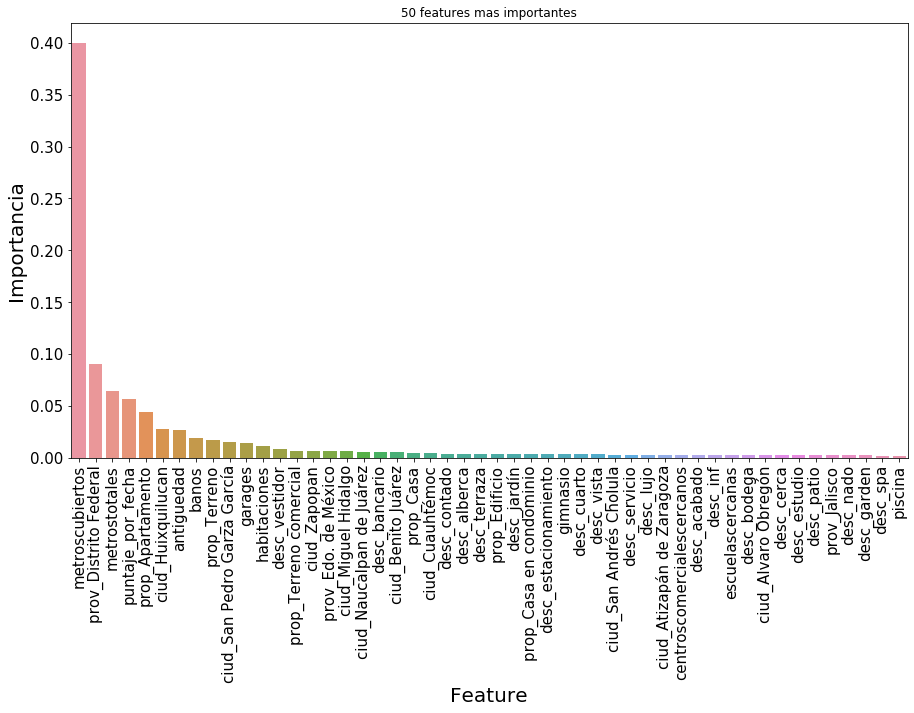

In [0]:
import seaborn as sns
plt.figure(figsize = (15,8))
#Muestro los 50 mas importantes
graf = sns.barplot(x = importancias.feature.head(50), y = importancias.importancia.head(50))
graf.set_title("50 features mas importantes")
graf.set_xlabel("Feature", fontsize = 20)
graf.set_ylabel("Importancia", fontsize = 20)
plt.xticks(fontsize = 15, rotation = 'vertical')
plt.yticks(fontsize = 15)

In [0]:

plt.figure(figsize = (15,8))
#Muestro los 200 menos importantes
graf = sns.barplot(x = importancias.feature.tail(50), y = importancias.importancia.tail(50), orient = 'v')
graf.set_title("50 features menos importantes")
graf.set_xlabel("Feature", fontsize = 20)
graf.set_ylabel("Importancia", fontsize = 20)
plt.xticks(fontsize = 15, rotation = 'vertical')
plt.yticks(fontsize = 15)

## (2) Gradient Boosting

from sklearn.ensemble import GradientBoostingRegressor

GBR_model = GradientBoostingRegressor()
scores = cross_val_score(GBR_model , X, Y, scoring="neg_mean_absolute_error", cv=5)
GBR_mae_score1 = -scores.mean()
GBR_mae_score1

## submit

df = crear_submit(GBR_model, X_normalized,Y, X_test_normalized, "GBR_normalized")
df.head()

## Submit con Random Forest

## Hago un submit con los datos normalizados

In [0]:
X_normalized = normalizar_data(X)
X_test_normalized = normalizar_data(X_test)
X_test_normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,0.672170,1.0,0.379717,0.309967,0.0,0.0,0.3625,1.000000,0.0,0.0,0.666667,0.222222,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.122642,0.0,0.122642,0.762322,1.0,0.0,0.1000,0.000000,0.0,0.0,0.333333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.169811,1.0,0.200472,0.681818,1.0,0.0,0.0000,0.333333,0.0,0.0,0.333333,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.167453,0.0,0.167453,0.650055,1.0,0.0,0.0250,0.333333,0.0,0.0,0.666667,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.153302,0.0,0.143868,0.324206,0.0,0.0,0.1250,0.000000,0.0,0.0,0.333333,0.111111,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
scores = cross_val_score(RF_model , X_normalized, Y, scoring="neg_mean_absolute_error", cv=3)
RF_mae_score1 = -scores.mean()
RF_mae_score1

In [0]:
Y.head()

In [0]:
submit1 = crear_submit(RF_model,X_normalized, Y, X_test_normalized, "RF_normalized")
submit1.head()